<a href="https://colab.research.google.com/github/samikshagadhave/YOLOv6_model/blob/main/Training_YOLOv6s_on_T51_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [ ]:
# Download MT-YOLOv6 repository and install requirements
!git clone https://github.com/meituan/YOLOv6
%cd YOLOv6
!pip install -r requirements.txt

Cloning into 'YOLOv6'...
remote: Enumerating objects: 3649, done.
remote: Counting objects: 100% (945/945), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 3649 (delta 825), reused 764 (delta 755), pack-reused 2704
Receiving objects: 100% (3649/3649), 46.92 MiB | 30.18 MiB/s, done.
Resolving deltas: 100% (2177/2177), done.
/content/YOLOv6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 97.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 wh

In [ ]:
# REPLACE with your custom code snippet generated above to use your data

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mwbsdPvkmXbwf9oRwN1g")
project = rf.workspace("samiksha-gadhave-oyljr").project("transmission-dataset-t51")
dataset = project.version(1).download("mt-yolov6")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=bbd21cc96168753eba3f21f9e9faada5488e707d0465e863154e2bd9e88f931e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found 

loading Roboflow workspace...
loading Roboflow project...

# Custom Training Details

There are a number of ways to fine tune training of YOLOv6, like custom configuration files for fine tuning, multi GPU support, and passing custom training arguments.


### Multi GPU Support

YOLOv6 supports single and multi GPU training.

Single GPU:
```
python tools/train.py --batch 256 --conf configs/yolov6s_finetune.py --data data/data.yaml --device 0
```

Multi GPU:
```
python -m torch.distributed.launch --nproc_per_node 4 tools/train.py --batch 256 --conf configs/yolov6s_finetune.py --data data/data.yaml --device 0,1,2,3
```

### Custom Configuration

YOLOv6 also supports creating a custom configuration file for training YOLOv6-n, YOLOv6-tiny, and YOLOv6s. (YOLOv6 m/l/x are coming soon.) You can also start training with a configuration that uses finetuning (e.g. `yolov6s_finetune.py` or starting from scratch (`yolov6s.py`). Finetuning will train faster though may not be as effective on unique datasets.

### Default Arguments
- --data-path, default='./data/coco.yaml', type=str, help='path of dataset')
- --conf-file, default='./configs/yolov6s.py', type=str, help='experiments description file')
- --img-size, type=int, default=640, help='train, val image size (pixels)')
- --batch-size, default=32, type=int, help='total batch size for all GPUs')
- --epochs, default=400, type=int, help='number of total epochs to run')
- --workers, default=8, type=int, help='number of data loading workers (default: 8)')
- --device, default='0', type=str, help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
- --eval-interval, type=int, default=20, help='evaluate at every interval epochs')
- --eval-final-only, action='store_true', help='only evaluate at the final epoch')
- --heavy-eval-range, default=50,help='evaluating every epoch for last such epochs (can be jointly used with --eval-interval)')
- --check-images, action='store_true', help='check images when initializing datasets')
- --check-labels, action='store_true', help='check label files when initializing datasets')
- --output-dir, default='./runs/train', type=str, help='path to save outputs')
- --name, default='exp', type=str, help='experiment name, saved to output_dir/name')
- --dist_url, type=str, default="default url: tcp://127.0.0.1:8888")
- --gpu_count, type=int, default=0)
- --local_rank, type=int, default=-1, help='DDP parameter')
- --resume, type=str, default=None, help='resume the corresponding ckpt')


# Begin Custom Training

We're ready to start custom training.

NOTE: We will modify two of the YOLOv6 training defaults in our custom training example: `epochs` and `image-size`. We will adjust from 400 to 100 epochs in our example for speed. Similarly, we will adjust image size from 600x600 to 416x416, which is the default size for other YOLO models (and makes comparisons easier as well as training slightly faster).


In [ ]:
# run this cell to begin training
!python tools/train.py --batch 32 --conf configs/yolov6s.py --epochs 100 --img-size 416 --data {dataset.location}/data.yaml --device 0

2023-07-15 09:20:43.830023: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 09:20:44.670822: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Using 1 GPU for training... 
training args are: Namespace(data_path='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', conf_file='configs/yolov6s.py', img_size=416, rect=False, batch_size=32, epochs=100, workers=8, device='0', eval_interval=20, eval_final_only=False, heavy_eval_range=50, check_images=False, check_labels=False, output_dir='./runs/train', name='exp', dist_url='env://', gpu_count=0, local_rank=-1, resume=False, write_trainbatch_tb=False, stop_aug_last_n_epoch=15, save_ckpt_on_last_n_epoch=-1, distill=False, distill_feat=False, quan

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments.

- --data, type=str, default='./data/coco.yaml', help='dataset.yaml path')
- -weights, type=str, default='./weights/yolov6s.pt', help='model.pt path(s)')
- --batch-size, type=int, default=32, help='batch size')
- --img-size, type=int, default=640, help='inference size (pixels)')
- --conf-thres, type=float, default=0.001, help='confidence threshold')
- --iou-thres, type=float, default=0.65, help='NMS IoU threshold')
- --task, default='val', help='val, or speed')
- --device, default='0', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')
- --half, default=False, action='store_true', help='whether to use fp16 infer')
- --save_dir, type=str, default='runs/val/', help='evaluation save dir')
- -name, type=str, default='exp', help='save evaluation results to save_dir/name')

Similar to training, we will pass 416x416 images for evaluation as an example.

In [ ]:
# Run evaluation
!python tools/eval.py --data {dataset.location}/data.yaml --img-size 416 --weights runs/train/exp/weights/best_ckpt.pt --device 0


Namespace(data='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', weights='runs/train/exp/weights/best_ckpt.pt', batch_size=32, img_size=416, conf_thres=0.03, iou_thres=0.65, task='val', device='0', half=False, save_dir='runs/val/', name='exp', shrink_size=0, infer_on_rect=True, reproduce_640_eval=False, eval_config_file='./configs/experiment/eval_640_repro.py', do_coco_metric=True, do_pr_metric=False, plot_curve=True, plot_confusion_matrix=False, verbose=False, config_file='', specific_shape=False, height=None, width=None)
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 18.50M, Gflops: 19.09
img record infomation path is:Transmission-dataset-T51-1/images/.valid_cache.json
Val: Checking formats of labels with 2 process(es): 
127 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 127/127 [00:00<00:00, 1385.34it/s]
Convert to COCO format
100% 127/127 [00:00<00:00, 2260

# Inference

We can run inference on images of our custom trained model using the provided inference utility.

There are a number of arguments we can adjust:

- --weights, type=str, default='weights/yolov6s.pt', help='model path(s) for inference.')
- --source, type=str, default='data/images', help='the source path, e.g. image-file/dir.')
- --yaml, type=str, default='data/coco.yaml', help='data yaml file.')
- --img-size, type=int, default=640, help='the image-size(h,w) in inference size.')
- --conf-thres, type=float, default=0.25, help='confidence threshold for inference.')
- --iou-thres, type=float, default=0.45, help='NMS IoU threshold for inference.')
- --max-det, type=int, default=1000, help='maximal inferences per image.')
- --device, default='0', help='device to run our model i.e. 0 or 0,1,2,3 or cpu.')
- --save-txt, action='store_true', help='save results to *.txt.')
- --save-img, action='store_false', help='save visuallized inference results.')
- --classes, nargs='+', type=int, help='filter by classes, e.g. --classes 0, or --classes 0 2 3.')
- --agnostic-nms, action='store_true', help='class-agnostic NMS.')
- --project, default='runs/inference', help='save inference results to project/name.')
- -name, default='exp', help='save inference results to project/name.')
- --hide-labels, default=False, action='store_true', help='hide labels.')
- --hide-conf, default=False, action='store_true', help='hide confidences.')
- --half, action='store_true', help='whether to use FP16 half-precision inference.')

We need to pass our custom `.yaml` file so that our label names are correct. We will also pass our `/test` directory to run inference on all images in our test split. In addition, similar to training, we will pass 416x416 images for inference as an example.


In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 11.42it/s]
Results saved to runs/inference/exp


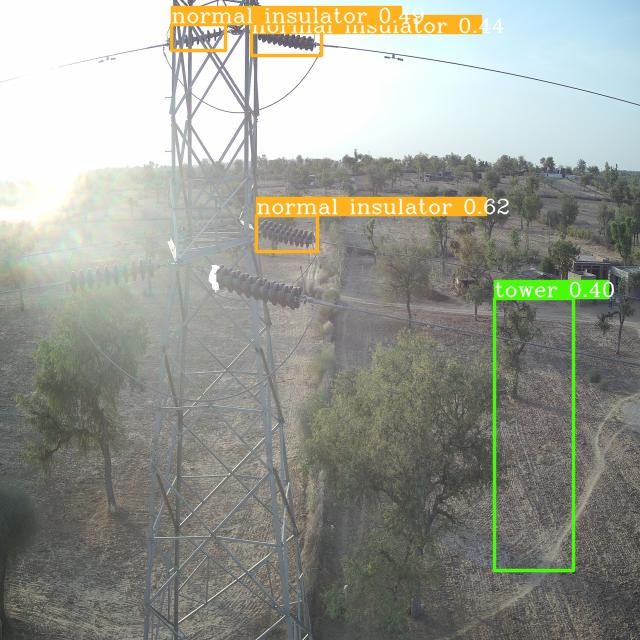

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0547-5_jpg.rf.ba66e51f00105991b7c51774c86ea74b.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0555_jpg.rf.83422825bd307642520c201b204a78ed.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0555_jpg.rf.83422825bd307642520c201b204a78ed.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.04it/s]
Results saved to runs/inference/exp


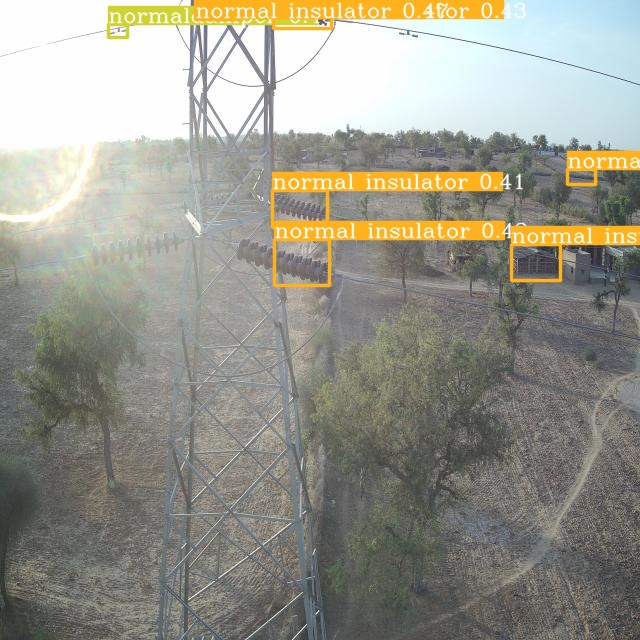

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0555_jpg.rf.83422825bd307642520c201b204a78ed.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0557-5_jpg.rf.c52160215539529c23c54a8f726c04c7.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0557-5_jpg.rf.c52160215539529c23c54a8f726c04c7.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.36it/s]
Results saved to runs/inference/exp


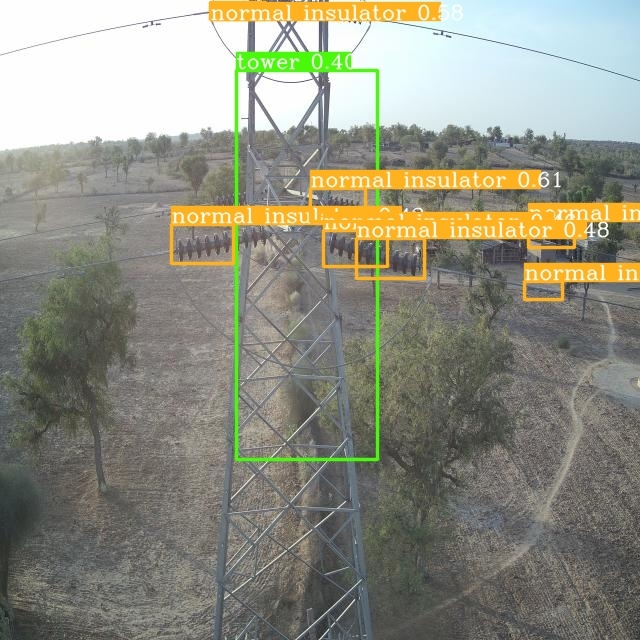

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0557-5_jpg.rf.c52160215539529c23c54a8f726c04c7.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0559-2_jpg.rf.260596356f70d0c25911459895681811.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0559-2_jpg.rf.260596356f70d0c25911459895681811.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 21.50it/s]
Results saved to runs/inference/exp


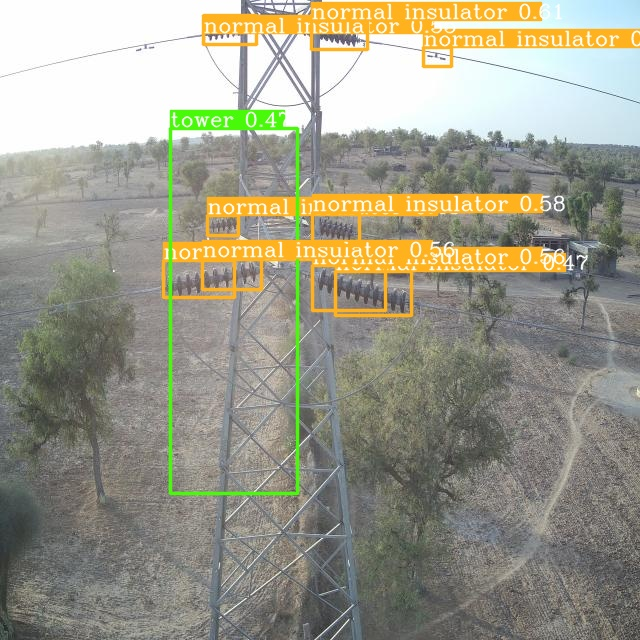

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0559-2_jpg.rf.260596356f70d0c25911459895681811.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0561_jpg.rf.46476cb52f16b6d985aa7b646e7d5d87.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0561_jpg.rf.46476cb52f16b6d985aa7b646e7d5d87.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.24it/s]
Results saved to runs/inference/exp


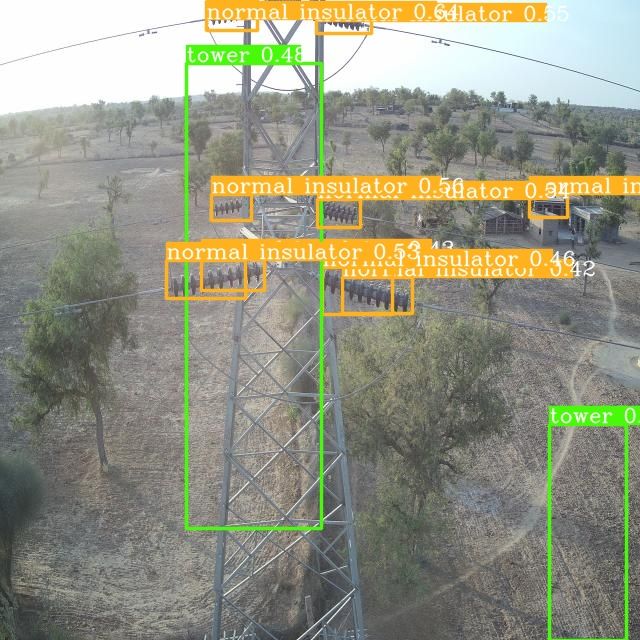

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0561_jpg.rf.46476cb52f16b6d985aa7b646e7d5d87.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0563-5_jpg.rf.7412894edb4ceb8274962459f0b2438f.jpg --device 0


Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0563-5_jpg.rf.7412894edb4ceb8274962459f0b2438f.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 18.83it/s]
Results saved to runs/inference/exp


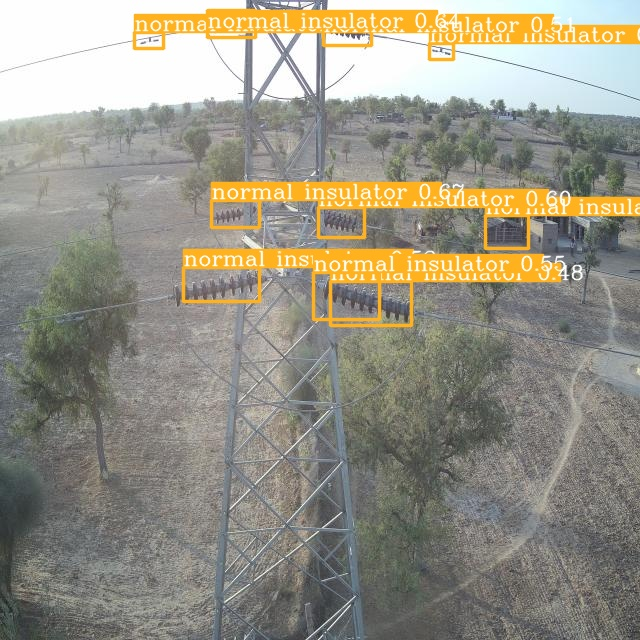

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0563-5_jpg.rf.7412894edb4ceb8274962459f0b2438f.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0563_jpg.rf.5b9b9dca4cbd17e356f2dc0178869768.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0563_jpg.rf.5b9b9dca4cbd17e356f2dc0178869768.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.10it/s]
Results saved to runs/inference/exp


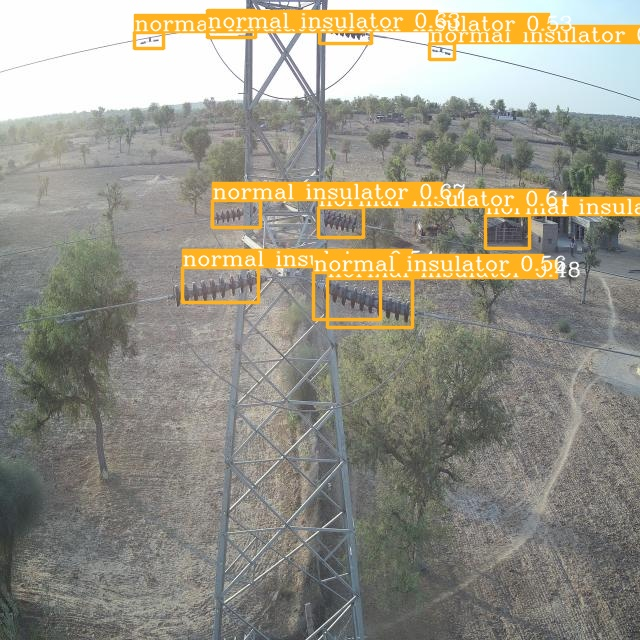

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0563_jpg.rf.5b9b9dca4cbd17e356f2dc0178869768.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0565-4_jpg.rf.d9300e9090d101665896829a31fc6694.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0565-4_jpg.rf.d9300e9090d101665896829a31fc6694.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.51it/s]
Results saved to runs/inference/exp


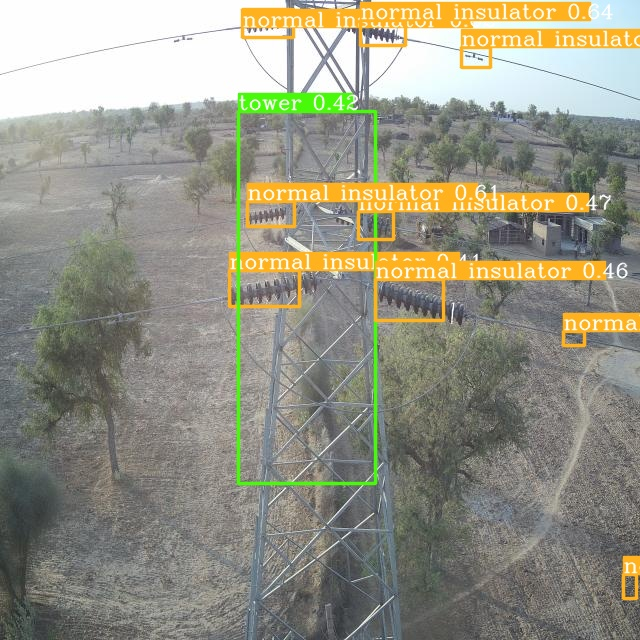

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0565-4_jpg.rf.d9300e9090d101665896829a31fc6694.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0571-6_jpg.rf.698a8aad100cc6359544c43805f1bd9d.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0571-6_jpg.rf.698a8aad100cc6359544c43805f1bd9d.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.96it/s]
Results saved to runs/inference/exp


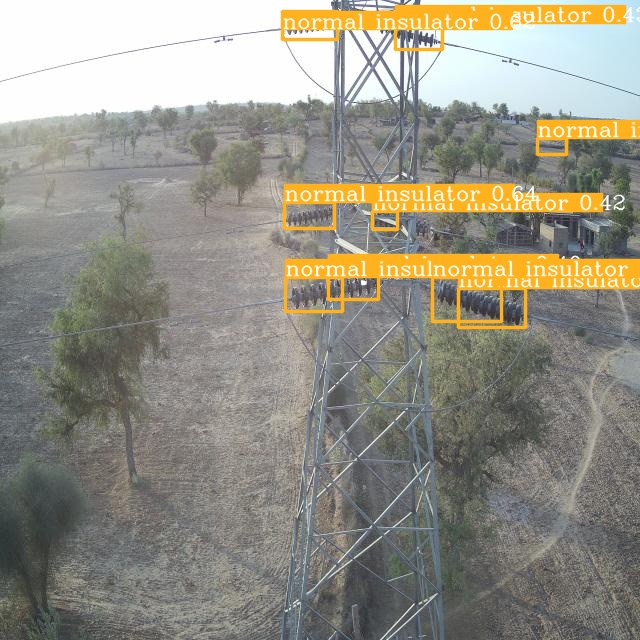

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0571-6_jpg.rf.698a8aad100cc6359544c43805f1bd9d.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0575_jpg.rf.e96bf8a7f1e11629e07bd58679336bd6.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0575_jpg.rf.e96bf8a7f1e11629e07bd58679336bd6.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.97it/s]
Results saved to runs/inference/exp


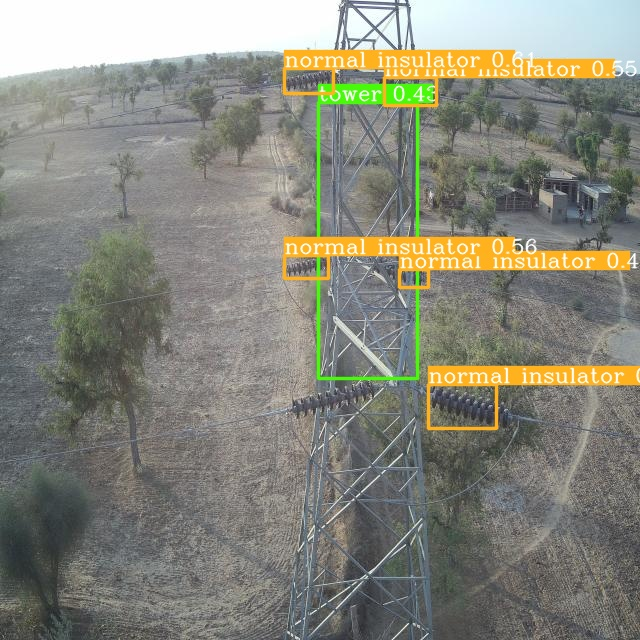

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0575_jpg.rf.e96bf8a7f1e11629e07bd58679336bd6.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0579-1_jpg.rf.cca9e2c20934e5c2c0fdf0ddc063faf2.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0579-1_jpg.rf.cca9e2c20934e5c2c0fdf0ddc063faf2.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.04it/s]
Results saved to runs/inference/exp


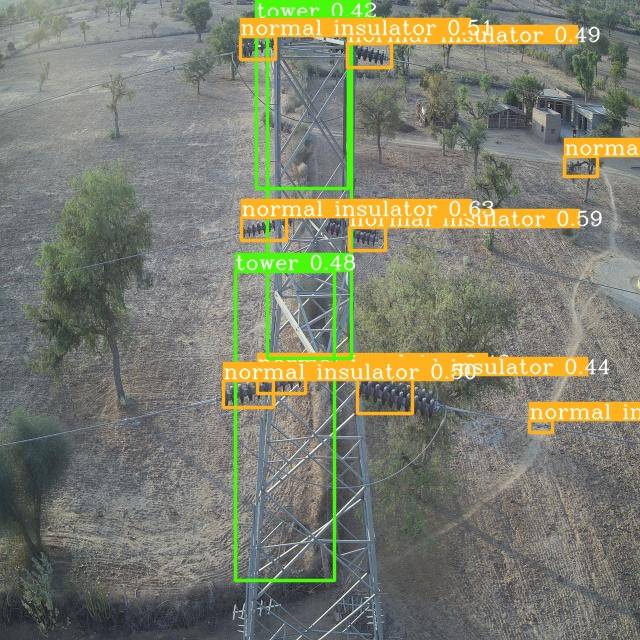

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0579-1_jpg.rf.cca9e2c20934e5c2c0fdf0ddc063faf2.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0587_jpg.rf.6453a539f24bab98eb0268e98807a3af.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0587_jpg.rf.6453a539f24bab98eb0268e98807a3af.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.32it/s]
Results saved to runs/inference/exp


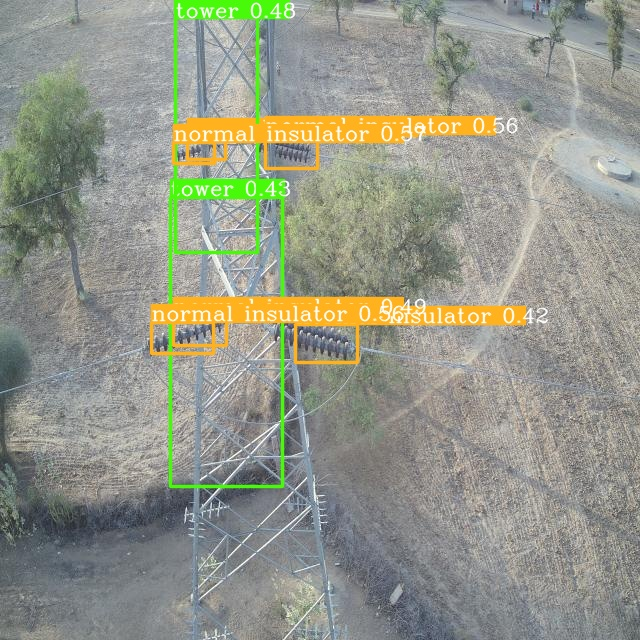

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0587_jpg.rf.6453a539f24bab98eb0268e98807a3af.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0591-3_jpg.rf.d3bbe754f05bc4b97e167df9e6c2bc48.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0591-3_jpg.rf.d3bbe754f05bc4b97e167df9e6c2bc48.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.75it/s]
Results saved to runs/inference/exp


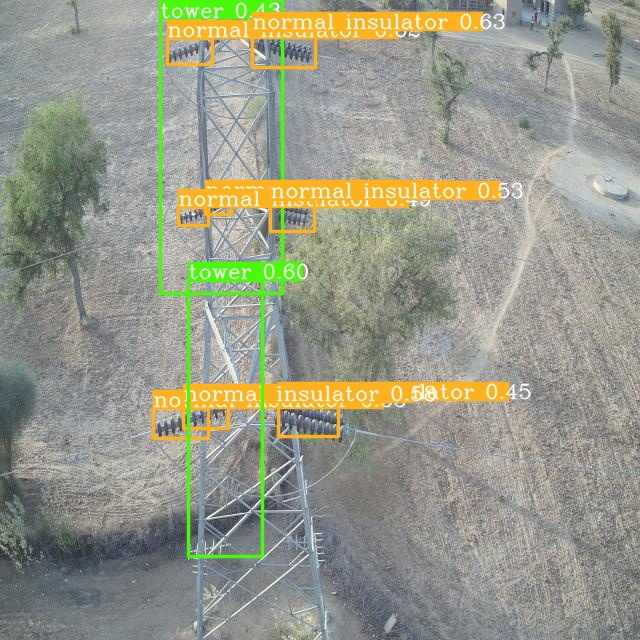

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0591-3_jpg.rf.d3bbe754f05bc4b97e167df9e6c2bc48.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0601-1_jpg.rf.77e9ac1383c3a1386d4af015fc918a1c.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0601-1_jpg.rf.77e9ac1383c3a1386d4af015fc918a1c.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.77it/s]
Results saved to runs/inference/exp


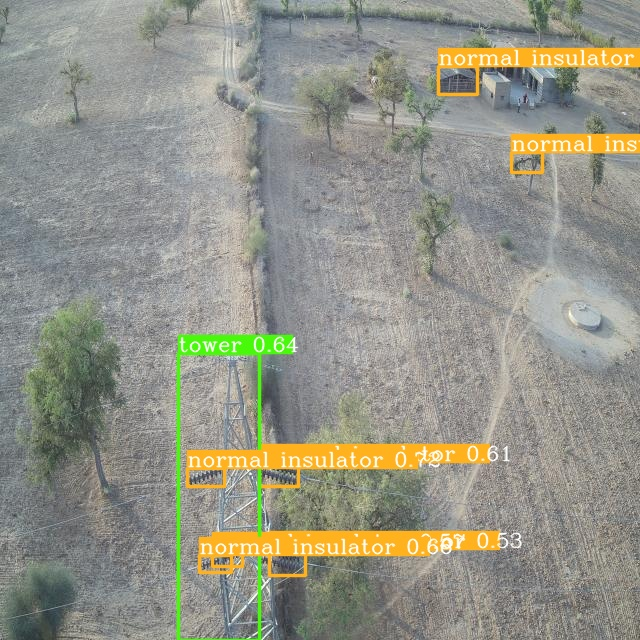

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0601-1_jpg.rf.77e9ac1383c3a1386d4af015fc918a1c.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0601-3_jpg.rf.dd18df77a621bbd34f110db43e72aa34.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0601-3_jpg.rf.dd18df77a621bbd34f110db43e72aa34.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.51it/s]
Results saved to runs/inference/exp


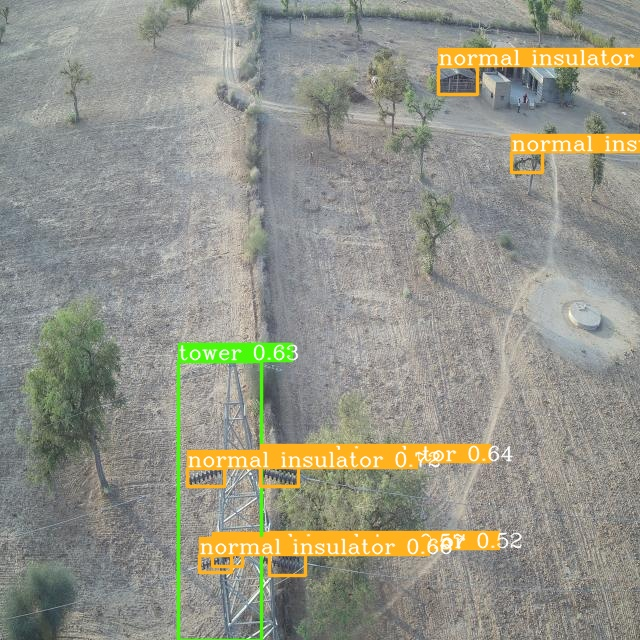

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0601-3_jpg.rf.dd18df77a621bbd34f110db43e72aa34.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0617-1_jpg.rf.dbe9bc46d192bfe3a83f1c8e265031d6.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0617-1_jpg.rf.dbe9bc46d192bfe3a83f1c8e265031d6.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.06it/s]
Results saved to runs/inference/exp


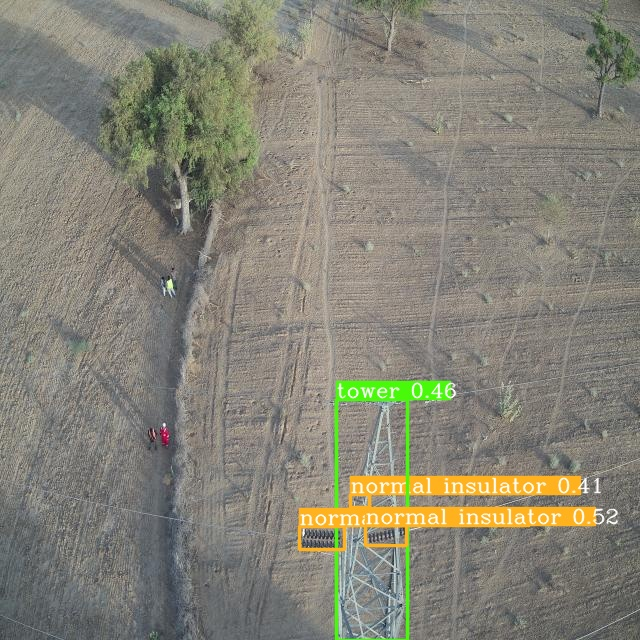

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0617-1_jpg.rf.dbe9bc46d192bfe3a83f1c8e265031d6.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0619-1_jpg.rf.53c5628c4c25d0921d83df119ea180bf.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0619-1_jpg.rf.53c5628c4c25d0921d83df119ea180bf.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 15.40it/s]
Results saved to runs/inference/exp


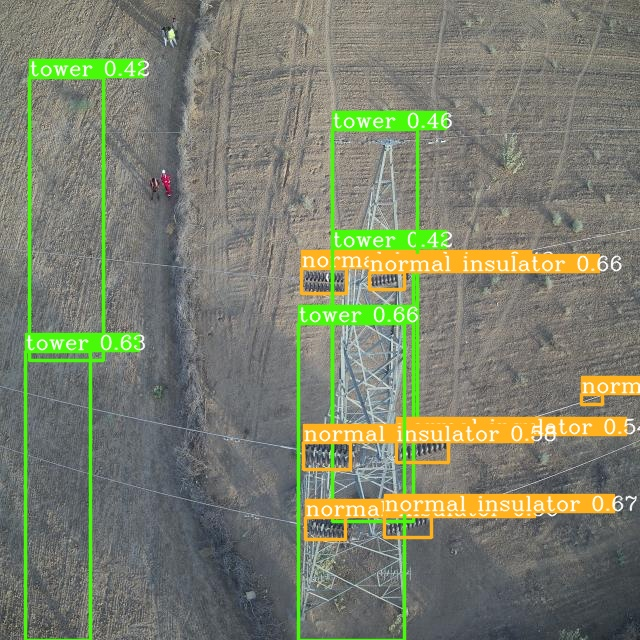

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0619-1_jpg.rf.53c5628c4c25d0921d83df119ea180bf.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0621-3_jpg.rf.47326b0804e4895afbac046b842a3881.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0621-3_jpg.rf.47326b0804e4895afbac046b842a3881.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.55it/s]
Results saved to runs/inference/exp


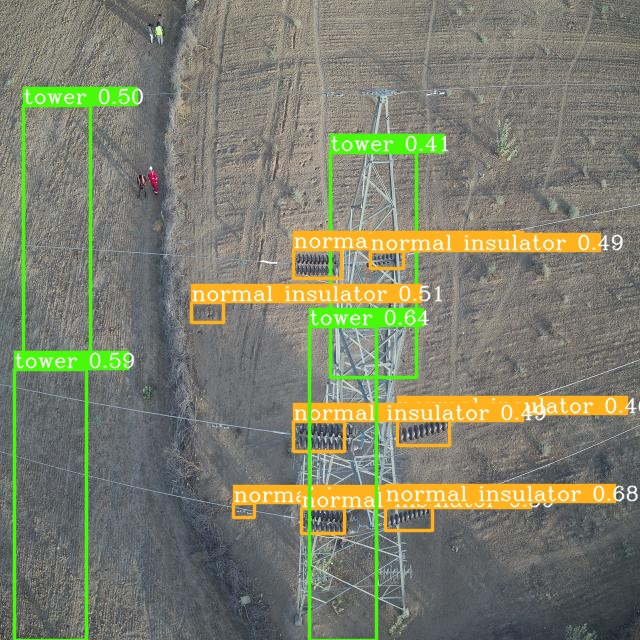

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0621-3_jpg.rf.47326b0804e4895afbac046b842a3881.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0635_jpg.rf.e711579270d723656d4d9c55e48114f9.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0635_jpg.rf.e711579270d723656d4d9c55e48114f9.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.56it/s]
Results saved to runs/inference/exp


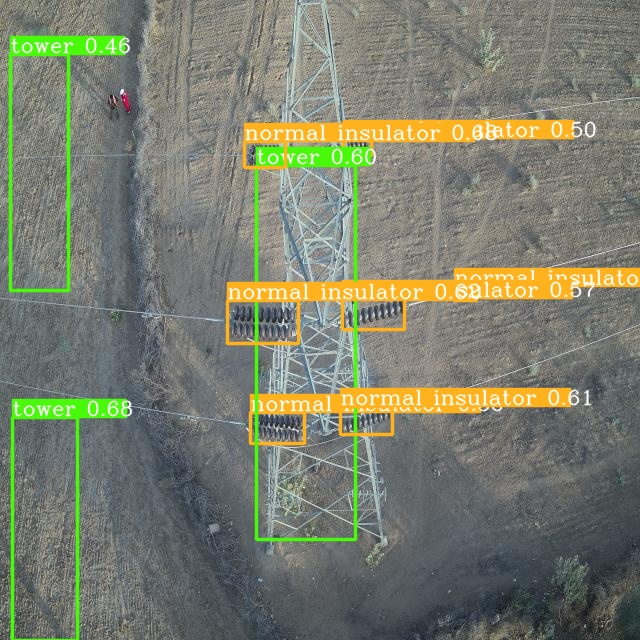

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0635_jpg.rf.e711579270d723656d4d9c55e48114f9.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0639-2_jpg.rf.9b08f8cecd1c6dc2ba5448137205230b.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0639-2_jpg.rf.9b08f8cecd1c6dc2ba5448137205230b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.66it/s]
Results saved to runs/inference/exp


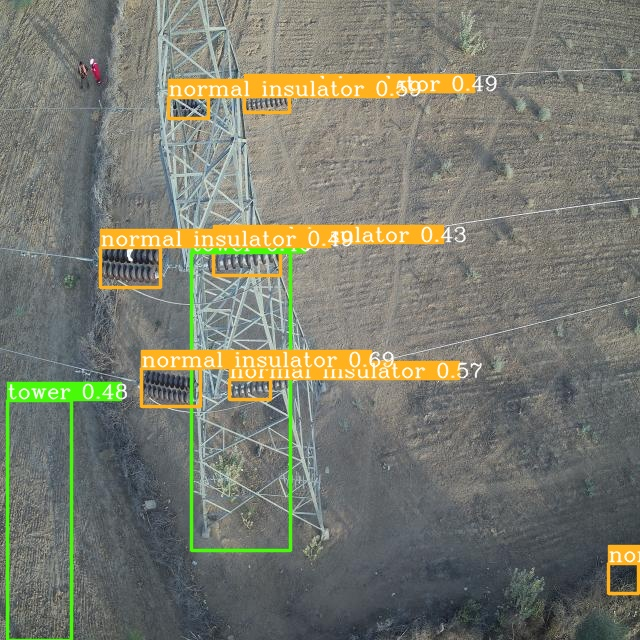

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0639-2_jpg.rf.9b08f8cecd1c6dc2ba5448137205230b.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0645_jpg.rf.0a386607cd06ad73f109b391cb008071.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0645_jpg.rf.0a386607cd06ad73f109b391cb008071.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 18.75it/s]
Results saved to runs/inference/exp


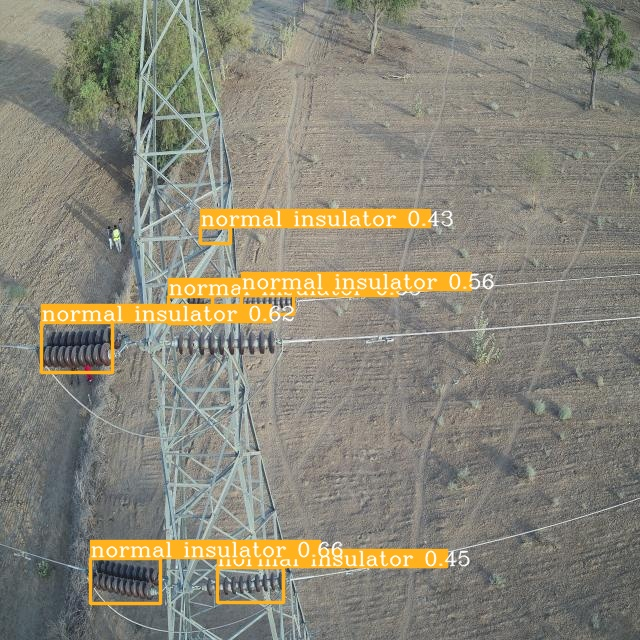

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0645_jpg.rf.0a386607cd06ad73f109b391cb008071.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0649-2_jpg.rf.d8f9412a54c20daf6af713408ffe73e9.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0649-2_jpg.rf.d8f9412a54c20daf6af713408ffe73e9.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.61it/s]
Results saved to runs/inference/exp


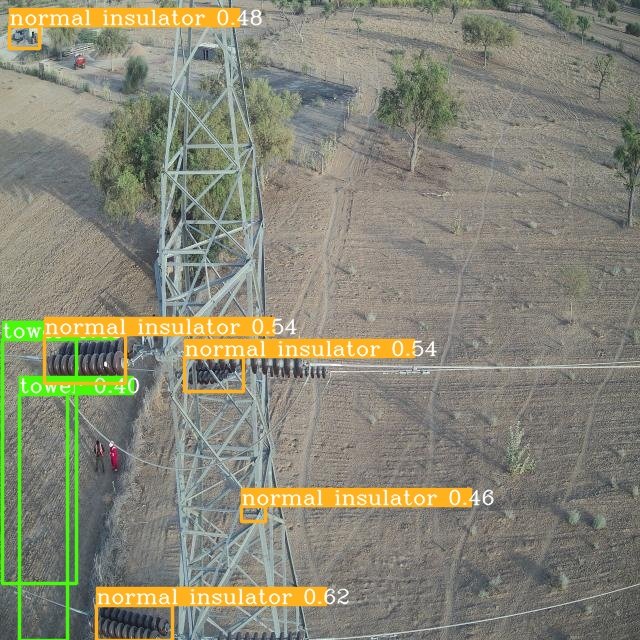

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0649-2_jpg.rf.d8f9412a54c20daf6af713408ffe73e9.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0649-3_jpg.rf.1feaf2c22e7e34c26de34506570f967b.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0649-3_jpg.rf.1feaf2c22e7e34c26de34506570f967b.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.26it/s]
Results saved to runs/inference/exp


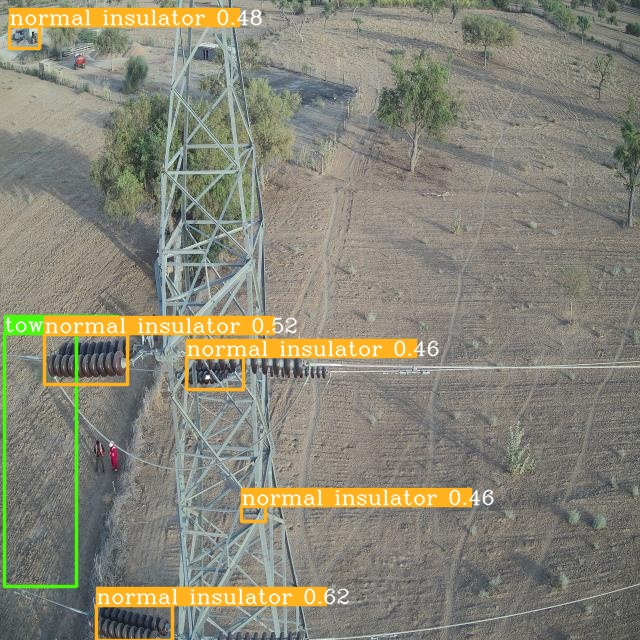

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0649-3_jpg.rf.1feaf2c22e7e34c26de34506570f967b.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0653-3_jpg.rf.82a0ce96abe4c82ba0b1fb14ecbfa025.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0653-3_jpg.rf.82a0ce96abe4c82ba0b1fb14ecbfa025.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 20.20it/s]
Results saved to runs/inference/exp


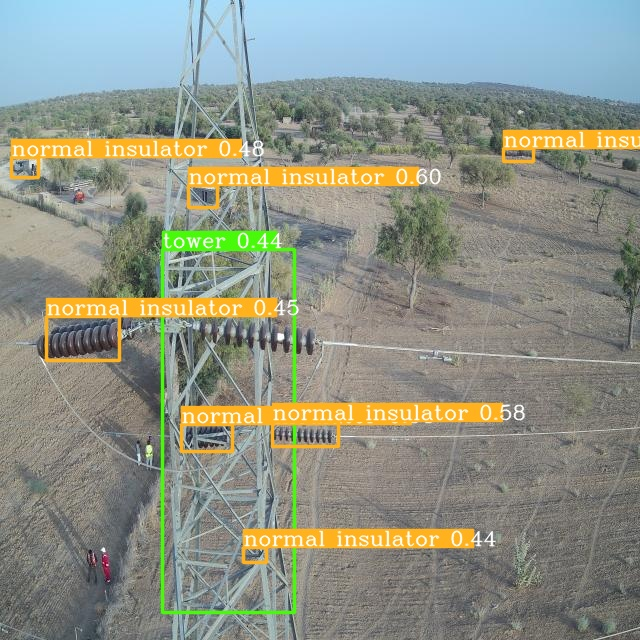

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0653-3_jpg.rf.82a0ce96abe4c82ba0b1fb14ecbfa025.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

In [ ]:
!python tools/infer.py --yaml {dataset.location}/data.yaml  --weights runs/train/exp/weights/best_ckpt.pt --source {dataset.location}/images/test/DJI_0655_jpg.rf.0143572675d9e2b5a0ce4868ff166716.jpg --device 0

Namespace(weights='runs/train/exp/weights/best_ckpt.pt', source='/content/YOLOv6/Transmission-dataset-T51-1/images/test/DJI_0655_jpg.rf.0143572675d9e2b5a0ce4868ff166716.jpg', webcam=False, webcam_addr='0', yaml='/content/YOLOv6/Transmission-dataset-T51-1/data.yaml', img_size=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device='0', save_txt=False, not_save_img=False, save_dir=None, view_img=False, classes=None, agnostic_nms=False, project='runs/inference', name='exp', hide_labels=False, hide_conf=False, half=False)
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 19.82it/s]
Results saved to runs/inference/exp


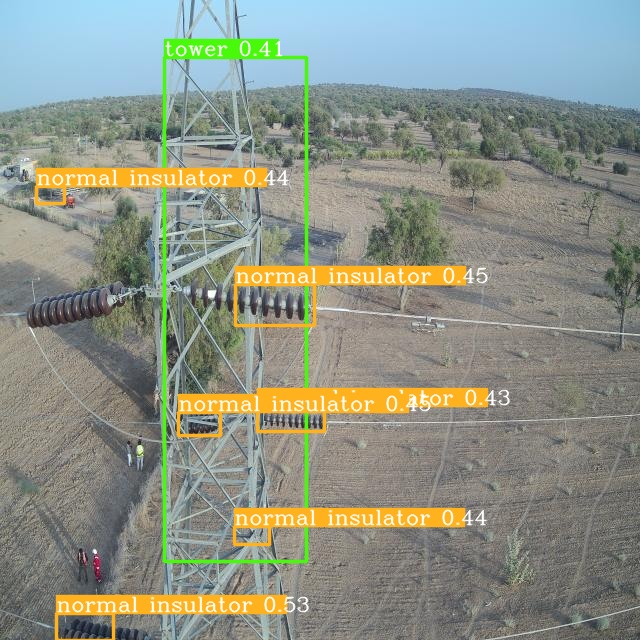

In [ ]:
import glob
from IPython.display import Image, display

i = 0
limit = 3 # max images to print
for imageName in glob.glob('./runs/inference/exp/DJI_0655_jpg.rf.0143572675d9e2b5a0ce4868ff166716.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n\n")
    i = i + 1

# OPTIONAL: Deployment

There is a [utility included](https://github.com/meituan/YOLOv6/tree/main/deploy/ONNX) to export the model as ONNX format for deployment as well:
```
python deploy/ONNX/export_onnx.py --weights runs/train/exp/weights/best_ckpt.pt --device 0
```

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


# Congrats! Happy training.

Hope you enjoyed this.